<div class="alert alert-info alertinfo" style="margin-top: 0px">
<h1>  Regression </h1>
</div>

Here are python codes ready for copy-and-paste use, provided that the data has been preprocessed in the following way:
missing and categorical data has been already dealt with, y (target) variable has been moved to last column, x (features) have been selected and data frame that contains only columns x and y has been saved to a new file.

<h1> Models in this notebook </h1>
<h3> * Simple Linear Regression </h3> 
<h3> * Multiple Linear Regression </h3> 
<h3> * Polynomial Regression </h3> 
<h3> * Support Vector Regression (SVR) </h3> 
<h3> * Decision Tree Regression </h3> 
<h3> * Random Forest Regression </h3> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# From directory
df=pd.read_csv(r'C:\Users\giuse\Desktop\GIThub\CODES FOR ML\MODELS - Supervised\regression data.csv')
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,13495,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,16500,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,16500,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,13950,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,17450,22,13.055556,0,1


In [3]:
df[['engine-size','price']].to_csv('singleXregression.csv', index=False)
df[['engine-size','length','width','price']].to_csv('multipleXregression.csv', index=False)

<div class="alert-success" style="margin-top: 0px">
<h1> Simple Linear Regression </h1>
</div>

Intercept:[-9.17272203e-17]
Coefficient[[0.88102675]]
Training accuracy r^2:  0.7762081362541865
Testing accuracy r^2:  0.6821862727918035
68.22% of tested data is explained by the model


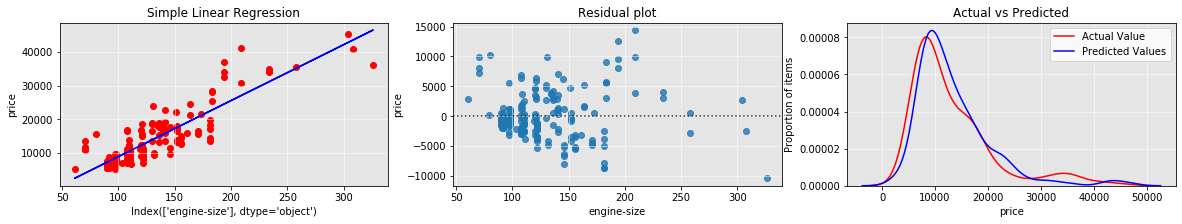

In [6]:
# Data
df = pd.read_csv('singleXregression.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Scaling  
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Model
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, y_train) 
print("Intercept:"+str(m.intercept_))
print("Coefficient"+str(m.coef_))

# Visualisation
feature=df.columns[:-1]
target=df.columns[-1]
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
 
ax[0].scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
ax[0].plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(m.predict(X_train)), color = 'blue')
ax[0].set_title('Simple Linear Regression')
ax[0].set_xlabel(feature)
ax[0].set_ylabel(target)
ax[0].set_facecolor((0.898, 0.898, 0.898))
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='white')

sns.residplot(df[feature], df['price'], ax=ax[1])
ax[1].set_title('Residual plot')
ax[1].set_xlabel(feature)
ax[1].set_ylabel(target)
ax[1].set_facecolor((0.898, 0.898, 0.898))
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='white')

sns.distplot(df[target], hist=False, color="r", label="Actual Value", ax=ax[2])
sns.distplot(sc_y.inverse_transform(m.predict(X_train)), hist=False, color="b", label="Predicted Values" , ax=ax[2])
ax[2].set_title('Actual vs Predicted')
ax[2].set_xlabel(target)
ax[2].set_ylabel('Proportion of items')
ax[2].set_facecolor((0.898, 0.898, 0.898))
ax[2].grid(which='major', linestyle='-', linewidth='0.5', color='white')

# Model accuracy 
from sklearn.metrics import r2_score
r1=m.score(X_train,y_train)
r2=m.score(X_test,y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

# Predictions
yhat=m.predict(X)

In [7]:
# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(y_train, m.predict((X_train)))
r2=r2_score(y_test, m.predict((X_test)))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

Training accuracy r^2:  0.7762081362541865
Testing accuracy r^2:  0.6821862727918035
68.22% of tested data is explained by the model


<div class="alert-success" style="margin-top: 0px">
<h1> Multiple Linear Regression </h1>
</div>

Intercept:[-9.17272203e-17]
Coefficient[[0.88102675]]
Training accuracy r^2:  0.7762081362541865
Testing accuracy r^2:  0.6821862727918035
68.22% of tested data is explained by the model


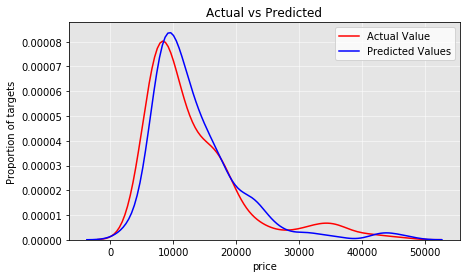

In [8]:
# Data

df.sort_values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Scaling  
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Model
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, y_train)
print("Intercept:"+str(m.intercept_))
print("Coefficient"+str(m.coef_))

# Visualisation
target=df.columns[-1]
plt.figure(figsize=(7, 4))
ax = sns.distplot(df[target], hist=False, color="r", label="Actual Value")
ax.set_facecolor((0.898, 0.898, 0.898))
sns.distplot(sc_y.inverse_transform(m.predict(X_train)), hist=False, color="b", label="Predicted Values" , ax=ax)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='white') 
plt.title('Actual vs Predicted')
plt.xlabel(target)
plt.ylabel('Proportion of targets')

# Model accuracy 
from sklearn.metrics import r2_score
r1=m.score(X_train,y_train)
r2=m.score(X_test,y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

# Predictions
yhat=m.predict(X)

In [9]:
# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(y_train, m.predict((X_train)))
r2=r2_score(y_test, m.predict((X_test)))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

Training accuracy r^2:  0.7762081362541865
Testing accuracy r^2:  0.6821862727918035
68.22% of tested data is explained by the model


<div class="alert-success" style="margin-top: 0px">
<h1> Polynomial Regression </h1>
</div>

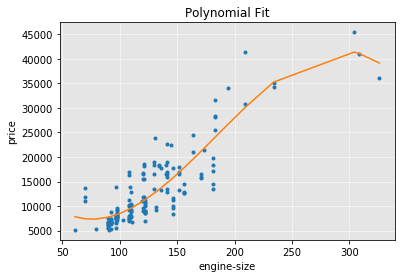

Training accuracy r^2:  0.7827908556651232
Testing accuracy r^2:  0.8066756425588791
80.67% of tested data is explained by the model


In [17]:
# Data 
order=3
df = pd.read_csv('singleXregression.csv')
feature=df.columns[0]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

# Scaling  
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = order)
X_poly = poly_reg.fit_transform(X_train)
m = LinearRegression()
m.fit(X_poly, y_train)

# Visualisation  (sort X-co-ordinates in order!)
x_pred = sc_X.inverse_transform(X_train)
y_pred= sc_y.inverse_transform(m.predict(X_poly)) 
dfv = pd.DataFrame((zip(x_pred, y_pred)), columns =['x_pred', 'y_pred'])
dfv = dfv.sort_values(by=['x_pred'])
target=df.columns[-1]
def PlotPolly(model, X_train, y_train):
    x_pred = dfv['x_pred']
    y_pred= dfv['y_pred']
    plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), '.', x_pred, y_pred, '-')
    plt.title('Polynomial Fit')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(feature)
    plt.ylabel(target)       
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='white')        
    plt.show()
    plt.close()

PlotPolly(m, X_train, y_train) 

# Model accuracy
from sklearn.metrics import r2_score
r1=m.score(poly_reg.fit_transform(X_train),y_train)
r2=m.score(poly_reg.fit_transform(X_test),y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

In [18]:
# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(m.predict(poly_reg.fit_transform(X_train))))
r2=r2_score(sc_y.inverse_transform(y_test), sc_y.inverse_transform(m.predict(poly_reg.fit_transform(X_test))))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

Training accuracy r^2:  0.7827908556651231
Testing accuracy r^2:  0.8066756425588791
80.67% of tested data is explained by the model


<div class="alert-success" style="margin-top: 0px">
<h1> Support Vector Regression (SVR) </h1>
</div>

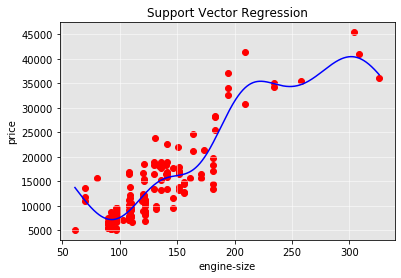

Training accuracy r^2:  0.848087363188324
Testing accuracy r^2:  0.7334921569002641
73.35% of tested data is explained by the model


In [19]:
# Data
df = pd.read_csv('singleXregression.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Model
from sklearn.svm import SVR
m = SVR(kernel = 'rbf')
m.fit(X_train, y_train)

# Visualisation
feature=df.columns[0]
target=df.columns[-1]
X_grid = np.arange(min(sc_X.inverse_transform(X_train)), max(sc_X.inverse_transform(X_train)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
fig = plt.figure()
ax1 = fig.gca()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='white')
ax1.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
ax1.plot(X_grid, sc_y.inverse_transform(m.predict(sc_X.transform(X_grid))), color = 'blue')
ax1.set_title('Support Vector Regression')
ax1.set_xlabel(feature)
ax1.set_ylabel(target)
ax1.set_facecolor((0.898, 0.898, 0.898))
plt.show()

# Model accuracy
from sklearn.metrics import r2_score
r1=m.score(X_train,y_train)
r2=m.score(X_test,y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

# Predictions
yhat=sc_y.inverse_transform(m.predict(sc_X.transform(X)))

In [20]:
# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(y_train, m.predict((X_train)))
r2=r2_score(y_test, m.predict((X_test)))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

Training accuracy r^2:  0.848087363188324
Testing accuracy r^2:  0.7334921569002641
73.35% of tested data is explained by the model


<div class="alert-success" style="margin-top: 0px">
<h1> Decision Tree Regression </h1>
</div>

Training accuracy r^2:  0.9349874262381856
Testing accuracy r^2:  0.9014122572518901
90.14% of tested data is explained by the model


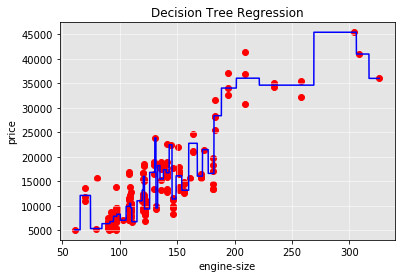

In [21]:
# Data
feature='engine-size'
target='price'
X = df[[feature]].values
y = df[[target]]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
# Scaling  is not applicable to decision trees

# Model
from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor(random_state = 0)
m.fit(X_train, y_train)
yhat = m.predict(X_test)

# Visualisation
fig = plt.figure()
ax = fig.gca()
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
ax.set_facecolor((0.898, 0.898, 0.898))
ax.grid(which='major', linestyle='-', linewidth='0.5', color='white')
ax.scatter(X, y, color = 'red')
ax.plot(X_grid, m.predict(X_grid), color = 'blue')
ax.set_title('Decision Tree Regression')
ax.set_xlabel(feature)
ax.set_ylabel(target)
fig

# Model accuracy
from sklearn.metrics import r2_score
r1=m.score(X_train,y_train)
r2=m.score(X_test,y_test)
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)
rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

# Predictions
yhat=sc_y.inverse_transform(m.predict(sc_X.transform(X)))

In [22]:
# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(y_train,m.predict(X_train))
r2=r2_score(y_test,m.predict(X_test))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))

Training accuracy r^2:  0.9349874262381855
Testing accuracy r^2:  0.90141225725189
90.14% of tested data is explained by the model


<div class="alert-success" style="margin-top: 0px">
<h1> Random Forest Regression </h1>
</div>

Training accuracy r^2:  0.9262332108665967
Testing accuracy r^2:  0.9617545374054769
96.18% of tested data is explained by the model


C:\Users\giuse\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


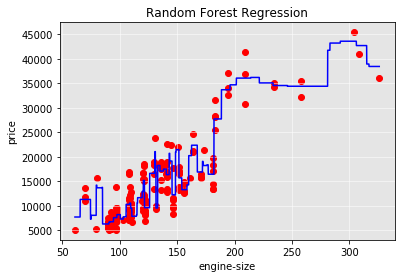

In [11]:
# Data
feature='engine-size'
target='price'
X = df[[feature]].values
y = df[[target]]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
# Scaling  is not applicable to decision trees

# Model
from sklearn.ensemble import RandomForestRegressor
m= RandomForestRegressor(n_estimators = 10, random_state = 0)
m.fit(X, y)

# Visualisation
fig = plt.figure()
ax = fig.gca()
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
ax.set_facecolor((0.898, 0.898, 0.898))
ax.grid(which='major', linestyle='-', linewidth='0.5', color='white')
ax.scatter(X, y, color = 'red')
ax.plot(X_grid, m.predict(X_grid), color = 'blue')
ax.set_title('Random Forest Regression')
ax.set_xlabel(feature)
ax.set_ylabel(target)
fig

# Model accuracy
from sklearn.metrics import r2_score
r1=r2_score(y_train,m.predict(X_train))
r2=r2_score(y_test,m.predict(X_test))
print('Training accuracy r^2: ', r1)
print('Testing accuracy r^2: ', r2)

rp=round(r2, 4)*100
print('{:,.2f}% of tested data is explained by the model'.format(rp))